<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GB656_Week_6_Assignment_6_(LASSO_Modeling_of_Insurance_Claims).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M6 | LASSO Assignment

Let's install relevant packages. We're going to rely on the statistical learning toolkit ski-cit learn, which provides LASSO regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#pandas setting
pd.set_option('display.max_columns', None) ### always show me all columns
pd.set_option('display.max_rows', None) ### always show all rows
pd.set_option('display.float_format', '{:.2f}'.format) ### Turn off scientific notation (format float)

## Predicting Claim Sizes

We consider a data set of claim sizes (severities) from Allstate, that was used in a [Kaggle competition](https://www.kaggle.com/c/allstate-claims-severity) and is now available from various repositories, e.g. [here](https://github.com/Architectshwet/Allstate-Claims-Severity-Data/blob/master/Datasets).

Let's load it, and take a look:

In [ ]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 367 (delta 71), reused 15 (delta 15), pack-reused 253 (from 2)
Receiving objects: 100% (367/367), 49.94 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (182/182), done.
Updating files: 100% (82/82), done.


In [ ]:
dat_1 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VI_13_InsuranceClaims_1.csv')
dat_2 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VI_13_InsuranceClaims_2.csv')
dat_3 = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_VI_13_InsuranceClaims_3.csv')
df = pd.concat([dat_1,dat_2,dat_3])

In [ ]:
df.shape

(188317, 132)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188317 entries, 0 to 68316
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 191.1+ MB


In [ ]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000,188317.000000
mean,294136.546440,0.493862,0.507190,0.498918,0.491814,0.487429,0.490946,0.484971,0.486439,0.485507,0.498067,0.493512,0.493152,0.493139,0.495718,3037.346151
std,169336.357671,0.187640,0.207201,0.202105,0.211292,0.209027,0.205272,0.178450,0.199370,0.181660,0.185876,0.209736,0.209426,0.212777,0.222488,2904.091574
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.000000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294542.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.580000
75%,440682.000000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.050000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


Target Variable here is "Loss" which is the severity of a claim, or the cost to Allstate.

So it is a large data set, and it is particularly large in the $p$ direction -- that is, there are many co-variates. So possibly shrinkage and selection will come in handy here.  One quick comment about the dataset and many Kaggle competitions more generally:  We don't really know what the variables `catx' and 'contx' stand for, so it is difficult to use experience/intuition in building a model -- which is an important aspect in real-world applications.  So performing well in a kaggle competition does not necessarily qualify a data scientist to work in the insurance industry.

## Preparing the data

There are a few very small losses that are outliers.  We thus disregard losses that are very small and  keep only records with loss greater or equal to $\$100$, also because we are interested in these in actual settings.

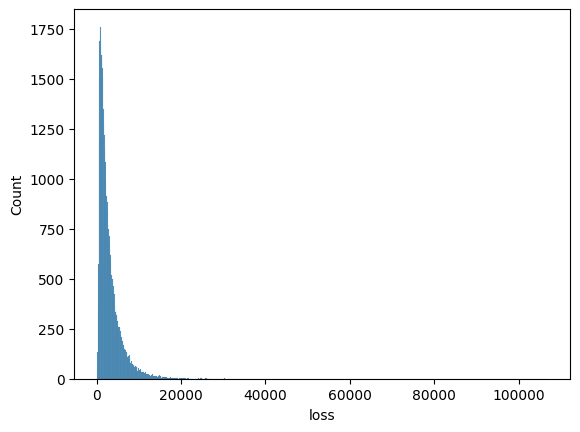

In [ ]:
sns.histplot(
    data = df,
    x = 'loss',
    binwidth = 100,
)
plt.show()

In [ ]:
df = df[df['loss']>100] ### Filter to loss amounts greater than 100

We delete the id column

In [ ]:
del df['id']

Since running the LASSO with the full set of data can take a very long time (especially if the penalty parameters aren's chosen right), it is fine to only us a sample of the data (you likely wouldn't do that in practice):

In [ ]:
df = df.sample(n=50000, random_state=45) #### a random 50000 records from the data, the random state will ensure that every time we run this code, we get the same sample

We convert categoricals into dummies:

In [ ]:
# objects = []
# for c in df.columns:
#     if str(df[c].dtype) == 'object':
#         objects.append(c)
objects = df.select_dtypes(include = ['object']).columns
X_ = df.drop(objects, axis = 1).astype('float64')
X_ = X_.drop(['loss'], axis = 1)
dummies = pd.get_dummies(df[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
y = df.loss

Let's look at out features:

In [ ]:
X.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_W,cat116_X,cat116_Y
34466,0.894333,0.358319,0.263570,0.705434,0.281143,0.808048,0.555567,0.76827,0.93383,0.78770,...,False,False,False,False,False,False,False,False,False,False
22575,0.474338,0.422197,0.246911,0.463029,0.281143,0.583075,0.423039,0.34445,0.52728,0.79139,...,False,False,False,False,False,False,False,False,False,False
8969,0.484469,0.555782,0.728827,0.514031,0.281143,0.425641,0.468732,0.71330,0.44352,0.33924,...,False,False,False,False,False,False,False,False,False,False
2219,0.471447,0.488789,0.571360,0.252014,0.388783,0.370753,0.336270,0.24564,0.40455,0.47225,...,False,False,False,False,False,False,False,False,False,False
1657,0.382325,0.245921,0.462347,0.345595,0.281143,0.563515,0.521238,0.48266,0.38448,0.39599,...,False,False,False,False,False,False,False,False,False,False


<BarContainer object of 935 artists>

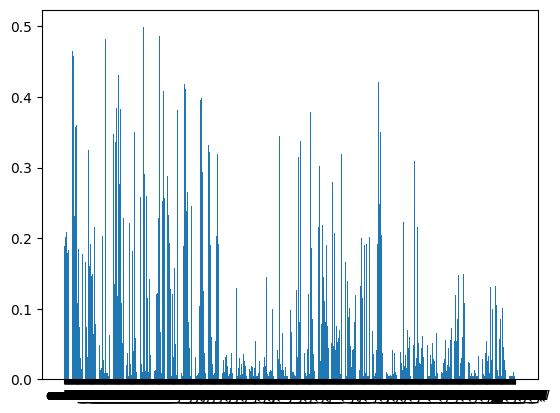

In [ ]:
plt.bar(X.columns,X.std(axis=0))

So it seems like all the variables are already at similar scales, so it doesn't seem necessary to normalize the data.

We still carry out this step just to make sure.

<BarContainer object of 935 artists>

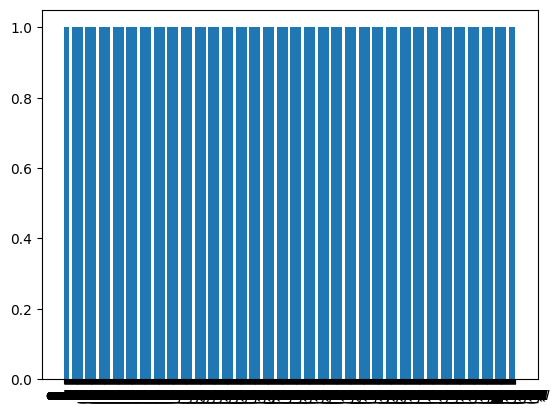

In [ ]:
X_org = X
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.bar(X_org.columns,X.std(axis=0))

We see that now the standard deviations of all features are the same at 1.

We split data into training and test sets:

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) #### 50% of data in test, 50% in train
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=2) #### Creates validation sets for x and y (used for parameter tuning)

In [ ]:
### View Dataset Splits
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

25000
25000
12500
12500
12500
12500


We go to logs. The log-transformation makes the data much more amenable to regression.

In [ ]:
y_train = np.log(y_train)
y_val = np.log(y_val)
y_test = np.log(y_test)

**Up to you**:
- Run a basic OLS model for loss prediction.
- Check if a LASSO regression can improve upon the basic OLS appproach, and how drastic the improvement will be. Proceed as follows:
  - Run a LASSO regression.
  - Evaluate and visualize the LASSO fit for a selection of tuning parameters.
  - Determine a good choice for the tuning parameter.
  - Evaluate the performance of your predictive model.

## OLS Regression

No Tuning, Scaled Design Matrix, Predictions made on test set

In [ ]:
### Set OLS Object
OLS_Claims = LinearRegression()

### Fit Model on training data using sklearn
OLS_Claims.fit(X_train,y_train)

LinearRegression()

In [ ]:
#### Fit Regression using Statsmodels
OLS_Claims_SM = sm.OLS(y_train,sm.add_constant(X_train)).fit()

In [ ]:
#### Show Count of all statistically significant Coefficients
Sig_Pvalues = OLS_Claims_SM.pvalues[OLS_Claims_SM.pvalues < 0.05].count()

print(f"Total Coefficients: {OLS_Claims_SM.pvalues.count()}")
print(f"Total Coefficients with Statistically Significant P-Values: {Sig_Pvalues}.")

Total Coefficients: 935
Total Coefficients with Statistically Significant P-Values: 501.


In [ ]:
### predictions using test data
y_hat = OLS_Claims.predict(X_test) #### predict using testing set

y_hat

array([7.06990298, 8.09363009, 7.34253592, ..., 7.63443605, 7.83196864,
       8.34693075])

In [ ]:
### Error Terms
Residuals = y_test - y_hat

In [ ]:
### MSE,RSME, and R^2 based on testing set
MSE = mean_squared_error(y_true = y_test, y_pred = y_hat)
RSME = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_hat))
R2 = r2_score(y_true= y_test, y_pred = y_hat)

print(f"MSE: {MSE:.4f}")
print(f"RSME: {RSME:.4f}")
print(f"R-squared: {R2:.4f}")

MSE: 0.3197
RSME: 0.5654
R-squared: 0.5156


The Scaled OLS Model does a commendable job of explaining the variance in the "Loss" variable (r^2 of 0.5156 to go with an MSE of 0.3197). Out of the 935 features, 501 of which were statistically significant (p-value < 0.05). With so many features available, I believe there is an opportunity to perform techniques to reduce the dimentionality of the data and or shrink some of the effects of the beta coefficients to create a higher performing, more generalized model.

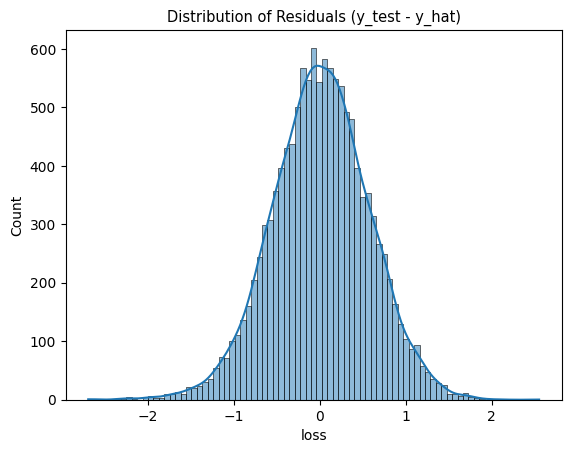

In [ ]:
# Check distribution of Error Terms:
sns.histplot(
    data = Residuals,
    kde = True
)
plt.title("Distribution of Residuals (y_test - y_hat)",fontsize = 10.5)
plt.show()

Distriubtion of residuals is in line with expectation (normally distributed).

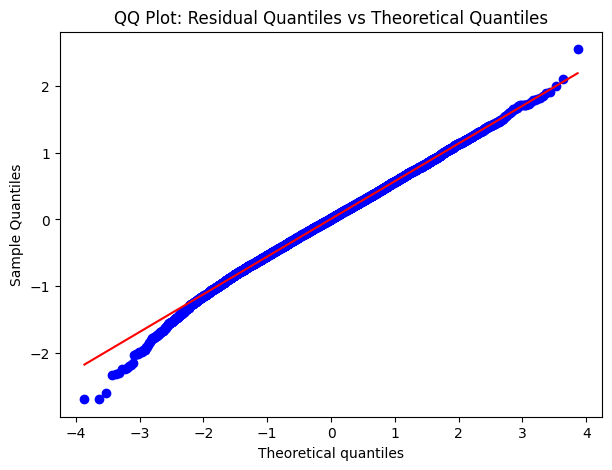

In [ ]:
### Show qq plot
plt.figure(figsize = (7,5))
st.probplot(Residuals, dist = "norm", plot = plt)
plt.title("QQ Plot: Residual Quantiles vs Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The Residuals fit very will against their normally distributed theoretical values. This further that an OLS model is a good fit on the data.

##LASSO Regression

### Base Model (Testing on Training Data)

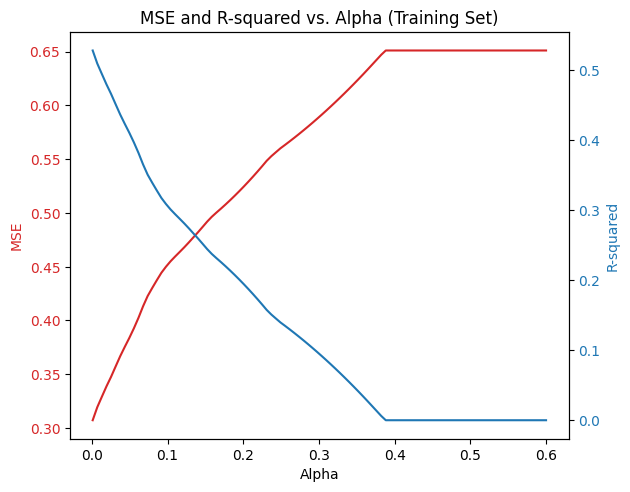

In [ ]:
alpha_values = np.linspace(0.001,0.6,100) ### Checking all alphas between 0.001 and 0.6 (100 values)
r2_values = []
mse_values = []

for alpha in alpha_values: ### Iterate for each alpha value
  model_lasso = Lasso(alpha=alpha) ### Iterate through each penalty value
  model_lasso.fit(X_train,y_train) ### Fit Lasso Regression
  y_pred_lasso = model_lasso.predict(X_train) ### Calculate Predictions per each alpha on test
  r_squared_lasso = r2_score(y_true = y_train, y_pred= y_pred_lasso) ### Calculate R2 per each alpha
  mse_lasso = mean_squared_error(y_true = y_train, y_pred= y_pred_lasso) ### Cacluate MSE per each alpha
  r2_values.append(r_squared_lasso) ### Append each R2 value to list
  mse_values.append(mse_lasso) ### Append each MSE value to list

# Plot MSE and R-squared
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('MSE', color = color)
ax1.plot(alpha_values, mse_values, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R-squared', color = color)
ax2.plot(alpha_values, r2_values, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.title('MSE and R-squared vs. Alpha (Training Set)')
plt.show()

**<u>Note:</u>**

On the training data, we see that once the penalty term (alpha) hits 0.4, our R^2 goes to 0, indicating none of the variance is being explained by the model (a "constant model"), and that the all of the coefficients have effectively been shrunken to 0. We know that in the training data, the model with the most features is usually the best performer, hense why the best MSE and R-sqaured values occur when the penalty term = 0. We will next perform K-Fold Cross validation on this model to find the optimal value for our penalty term, alpha.

## LASSO With CV (K-Fold)

In [ ]:
# Define alpha values to test
alpha_values = np.linspace(0.001,5,1000) ### Look at alphas between 0.001 and 5 (1000 observations) (expanded range here due to much faster performance)

# Run K-Folds Cross Validation Algorithm (try using 5 folds)
lasso_cv = LassoCV(alphas=alpha_values, cv=5) ### cv = 5: k-fold cross validation = 5 (5 folds) (4 training subsets of our training data, one testing)
### Train the model
lasso_cv.fit(X_train, y_train) ### A model is trained for each "fold" tied to each value for alpha (5 folds times 1000 values = 5000 models being trained, 5 for each alpha)
#### The optimal value for alpha is then selected.

# Validation Metrics (predict on validation data to test model and tune parameters as needed)
y_pred_val = lasso_cv.predict(X_val) ### Predict on validation set
residuals_cv = y_val - y_pred_val ### Residuals on validation set
r2_val = r2_score(y_val, y_pred_val) ### r2 on validation set
mse_val = mean_squared_error(y_val,y_pred_val) ### mse on validation set

# Find the Optimal Alpha
Optimal_Alpha = lasso_cv.alpha_ ### lassoCV will automatically provide the best alpha for us

In [ ]:
### Show validation Metrics for optimal values
print(f"The R^2 based on the validation data is: {r2_val:.4}")
print(f"The MSE based on the validation data is: {mse_val:.4}")
print(f"The Optimal alpha based on the validation data is: {Optimal_Alpha:.4}")

The R^2 based on the validation data is: 0.5076
The MSE based on the validation data is: 0.3243
The Optimal alpha based on the validation data is: 0.006004


In [ ]:
# Refit model on optimal alpha, then predict using testing data
lasso_optimal = Lasso(alpha = Optimal_Alpha)
# Retrain the model training set
lasso_optimal.fit(X_train,y_train)
# Make Predictions using Testing Data
y_pred_testing = lasso_optimal.predict(X_test)
# Calculate Residuals based on testing sets
residuals_optimal = y_test - y_pred_testing
# Calculate R^2 based on test set
r2_testing = r2_score(y_test,y_pred_testing)
# Calculate MSE based on test set
mse_testing = mean_squared_error(y_test, y_pred_testing)

In [ ]:
### Count the number of coeff that the Lasso Model did not set to zero
Total_NonZero_Coeff = np.sum(lasso_optimal.coef_ != 0) ### Some negative coefficients were kept, as the alogorithm deemed them necessary

print(f"The Optimal Lasso Model Selected {Total_NonZero_Coeff} Coefficents out of 935.")

The Optimal Lasso Model Selected 231 Coefficents out of 935.


In [ ]:
### Show metrics of the Optimal Lasso Model
print(f"Optimal Penalty Value: {Optimal_Alpha:.4}")
print(f"The R^2 of the Optimized Lasso Model is: {r2_testing:.4}")
print(f"The MSE of the Optimized Lasso Model is: {mse_testing:.4}")

Optimal Penalty Value: 0.006004
The R^2 of the Optimized Lasso Model is: 0.5146
The MSE of the Optimized Lasso Model is: 0.3203


## Key Takeaways:

The scaled OLS regression and the Optimized Lasso model performed very similarly in terms of R^2 and MSE (R2 of 0.5146 for the Lasso Model vs 0.5157 for the Scaled OLS Model and MSE of 0.3203 for the Lasso Model vs 0.3197 for the OLS Model).

When looking at the selected tuning parameter for the lasso regression, this begins to make more sense, as our Cross Validation Algorithm identified a lamda value of 0.006. This is a very minor penalty on the model's coefficients, which explains why its performance is so similar to that of the OLS model. It is interesting to note, though, that the optimal lasso model still only selected 231 of the 935 features!

With all that being said, I think the fact that the Lasso Model after Cross Validation was able to narrow down our features to about 231 out of 935, and still achieve roughly the same performance as the full OLS model makes it the better choice for this specific dataset, given the shear amount of variables provided.